# Variable transformers : LogTransformer

The LogTransformer() applies the natural logarithm or the base 10 logarithm to
numerical variables. The natural logarithm is logarithm in base e.

The LogTransformer() only works with numerical non-negative values. If the variable
contains a zero or a negative value, the transformer will return an error.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.transformation import LogTransformer
from feature_engine.imputation import ArbitraryNumberImputer

In [4]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

<AxesSubplot:>

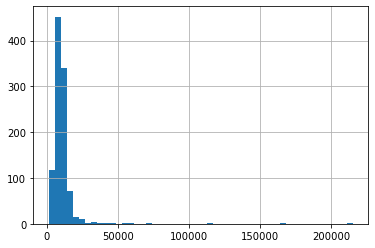

In [6]:
X_train['LotArea'].hist(bins=50)

<AxesSubplot:>

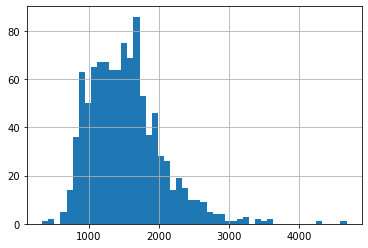

In [7]:
X_train['GrLivArea'].hist(bins=50)

In [8]:
lt = LogTransformer(variables = ['LotArea', 'GrLivArea'])

lt.fit(X_train)

LogTransformer(variables=['LotArea', 'GrLivArea'])

In [9]:
# variables that will be transformed
lt.variables

['LotArea', 'GrLivArea']

In [10]:
train_t = lt.transform(X_train)
test_t = lt.transform(X_test)

<AxesSubplot:>

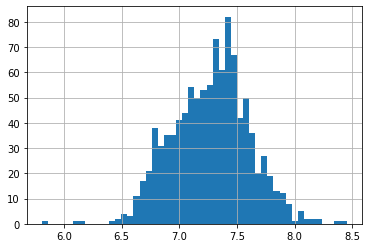

In [11]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

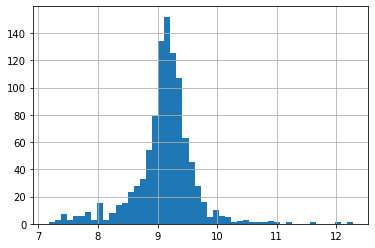

In [12]:
# transformed variable
train_t['LotArea'].hist(bins=50)

### Selecting all variables 

We select all numerical variables if no variables are passed. 
Trivally we add 1 to get values within domain.

In [17]:
arbitrary_imputer = ArbitraryNumberImputer()
arbitrary_imputer.fit(X_train)

ArbitraryNumberImputer(variables=['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                                  'FullBath', 'HalfBath', 'BedroomAbvGr',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageYrBlt', 'GarageCars', 'GarageArea',
                                  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', ...])

In [31]:
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [32]:
train_t[arbitrary_imputer.variables]=train_t[arbitrary_imputer.variables]+1
test_t[arbitrary_imputer.variables]=test_t[arbitrary_imputer.variables]+1

In [33]:
# train_t[arbitrary_imputer.variables]<=0=1

In [34]:
lt_default = LogTransformer()

lt_default.fit(train_t)

LogTransformer(variables=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
                          'OverallCond', 'YearBuilt', 'YearRemodAdd',
                          'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                          'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                          'FullBath', 'HalfBath', 'BedroomAbvGr',
                          'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                          'GarageYrBlt', 'GarageCars', 'GarageArea',
                          'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', ...])

In [36]:
train_t = lt_default.transform(train_t)
test_t = lt_default.transform(test_t)

<AxesSubplot:>

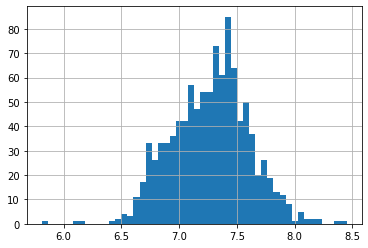

In [37]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

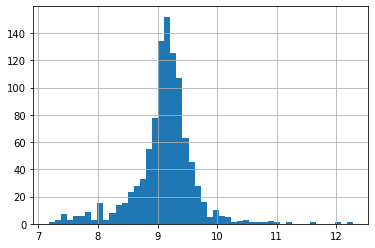

In [38]:
# transformed variable
train_t['LotArea'].hist(bins=50)